# Data Preprocessing and Feature Engineering 

## Advantages of data preprocessing and feature engineering 
- it is the magic touch for AI and ML. Essential steps to the DS pipeline before deploying ML
- Features (cols) are teh building blocks of ML prediction. Refining them will help improve the model performance and accuracy. 
- Feature engineering care create additional features that could help the model find hidden patterns in the data (feature extraction)
- To perform good FE and DP: 
    - Technical expertise
    - Domain knowledge
    - Emperical process is stats and ML 

## Techniques
- Imputations: handling missing values
- Outlier treatment: removing/replacing outliers
- Binning: feature extraction by converting continuous values to ranges 
- Grouping: feature extraction using aggregation 
- Scaling: normalizastion of numerical ranes
- Encoding: converting categorical variables into numerical 
- Dimensionality reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\chand\AppData\Local\Temp\ipykernel_64928\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Imputation
use this when: 
- data is missing at random 
- missing would look like most of the observations

Pros: 
- easy to implement 
- fast
- can e applied in a production pipeline

Cons: 
- Possibility of distorting the data distribution. the more missing values, the worse it gets 
    - when data is normally distributed, use the mean 
    - otherwise use median for skewed distributions 

Dropping Missing Values: 
- pros
    - quick and easy
    - preserves distributions 
- cons: 

In [2]:
students = {
    'Name' : ['Mark', 'Alex', 'John', 'Amy', 'Steve', 'Ally', 'Kelly', 'Todd'],
    'Score' : [40, np.NaN, 44, np.NaN, 26, 39, 42, np.NaN],
    'University' : ['UTC', np.NaN, 'MSU', 'MIT', 'CalTech', 'CalTech', 'CalTech', 'MSU'],
}
  
# creating a Dataframe object
 
df = pd.DataFrame(students)
df
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,NaN,NaN
2,John,44.0,MSU
3,Amy,NaN,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,NaN,MSU


In [3]:
#for numerical, use median or mean to replace missing values 
print(df['Score'].mean(skipna=True))

38.2


In [4]:
print(df['Score'].median(skipna=True))

40.0


In [5]:
#pip install scikit-learn as sklearn

In [6]:
#method 1: sklearn 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') #define the engine for using average for missing values 

df['Score'] = imputer.fit_transform(df['Score'].values.reshape(-1,1)) #values converts into numpy and reshape adjusts the orientation (it takes the vertical col rather than horizontal)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,NaN
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


In [7]:
#method 2: using pandas - easier
df['Score'].fillna(df['Score'].mean(skipna=True),inplace=True)
df

C:\Users\chand\AppData\Local\Temp\ipykernel_64928\1260901243.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Score'].fillna(df['Score'].mean(skipna=True),inplace=True)


,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,NaN
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


In [8]:
df['Score'].fillna(df['Score'].median(skipna=True),inplace=True)
df

C:\Users\chand\AppData\Local\Temp\ipykernel_64928\210662795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Score'].fillna(df['Score'].median(skipna=True),inplace=True)


,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,NaN
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


In [9]:
#For categorical values: can either fill with your manual entry or use the value with the highest frequency/count
df['University'].fillna(df['University'].value_counts().index[0],inplace=True)
df


C:\Users\chand\AppData\Local\Temp\ipykernel_64928\2106343497.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['University'].fillna(df['University'].value_counts().index[0],inplace=True)


,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,CalTech
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


In [10]:
#dropping missing values 
df.dropna(axis=0,inplace=True)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,CalTech
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


## outlier treatment

## Data Dictionary: Boston house prices dataset
---------------------------
**Data Set Characteristics:**
Number of Instances: 506
Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [11]:
boston_df = pd.read_csv('boston_sklearn.csv')
print(boston_df.shape)
boston_df.head()


(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

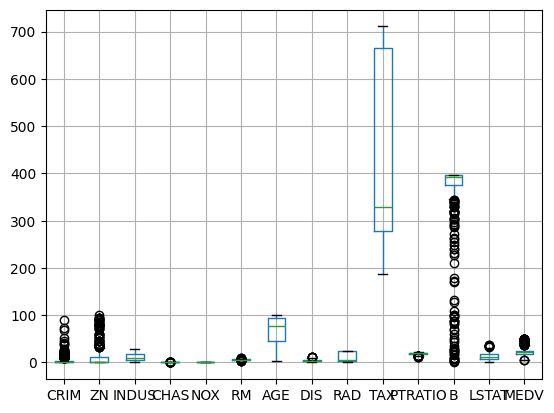

In [12]:
#using default pandas lib 
boston_df.boxplot() #hard to interpret because the scale for each variable is different. better to do this one-by-one so each can have own y-axix

In [15]:
# use loops to automate process above
fig, axs = plt.subplots(nrows=2,ncols=7, figsize=(12,6))





In [16]:
index =0 # resetting the index to iteration
axs = axs.flatten() 

for col in boston_df.columns:
    sns.boxplot(data=boston_df,y=col, ax=axs[index], color='lightblue')
    index +=1 #add 1 to index to move on to next cell

plt.tight_layout(pad=0.4)

In [20]:
#IQR functin 

def outlier_treat(col): 
    #calc Q1 & Q3 (the 25th and 75th percentile)
    Q1,Q3 = np.percentile(col,[25,75])

    #calc IQR
    IQR = Q3-Q1 

    #calc the lower and upper ranges (the whisker values)
    lower_range = Q1 - 1.5*IQR 
    upper_range = Q3 + 1.5*IQR

    return lower_range,upper_range

In [21]:
lower_range,upper_range = outlier_treat(boston_df['MEDV'])
print(lower_range,upper_range)

5.0624999999999964 36.962500000000006


In [ ]:
#get rid of outliers 
mask = boston_df['MEDV']>lower_range

In [ ]:
sns.boxplot(boston_df_no,x='MEDV')